# Graphes - énoncé

Pour avoir des graphiques inclus dans le notebook, il faut ajouter cette ligne et l'exécuter en premier.

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


On change le style pour un style plus moderne, celui de [ggplot](http://ggplot2.org/) :

In [2]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [1]:
import pyensae
%nb_menu

## Données

Pour tous les exemples qui suivent, on utilise les résultat [élection présidentielle de 2012](https://www.data.gouv.fr/fr/datasets/election-presidentielle-2012-resultats-572124/). Si vous n'avez pas le module [actuariat_python](http://www.xavierdupre.fr/app/actuariat_python/helpsphinx/index.html), il vous suffit de recopier le code de la fonction [elections_presidentielles](http://www.xavierdupre.fr/app/actuariat_python/helpsphinx/_modules/actuariat_python/data/elections.html#elections_presidentielles) qui utilise la fonction [read_excel](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_excel.html) :

In [4]:
from actuariat_python.data import elections_presidentielles
dict_df = elections_presidentielles()

In [5]:
list(dict_df.keys())

['Cantons T1',
 'Circo leg T1',
 'Circo leg T2',
 'Départements T1',
 'Cantons T2',
 'Régions T1',
 'Départements T2',
 'Régions T2',
 'France entière T1T2']

In [6]:
dict_df["Départements T1"].head()

,Code du département,Libellé du département,Inscrits,Abstentions,% Abs/Ins,Votants,% Vot/Ins,Blancs et nuls,% BlNuls/Ins,% BlNuls/Vot,...,Prénom.8,Voix.8,% Voix/Ins.8,% Voix/Exp.8,Sexe.9,Nom.9,Prénom.9,Voix.9,% Voix/Ins.9,% Voix/Exp.9
0,1,AIN,393808,65996,16.76,327812,83.24,6453,1.64,1.97,...,Nicolas,7208,1.83,2.24,M,HOLLANDE,François,73096,18.56,22.75
1,2,AISNE,376068,72928,19.39,303140,80.61,5196,1.38,1.71,...,Nicolas,5853,1.56,1.96,M,HOLLANDE,François,80751,21.47,27.10
2,3,ALLIER,256275,45266,17.66,211009,82.34,5059,1.97,2.40,...,Nicolas,4068,1.59,1.98,M,HOLLANDE,François,61131,23.85,29.68
3,4,ALPES DE HAUTE PROVENCE,123933,21034,16.97,102899,83.03,2111,1.70,2.05,...,Nicolas,1845,1.49,1.83,M,HOLLANDE,François,24551,19.81,24.36
4,5,HAUTES ALPES,106865,18246,17.07,88619,82.93,1842,1.72,2.08,...,Nicolas,1782,1.67,2.05,M,HOLLANDE,François,21248,19.88,24.49


In [7]:
dict_df["Départements T2"].head()

,Code du département,Libellé du département,Inscrits,Abstentions,% Abs/Ins,Votants,% Vot/Ins,Blancs et nuls,% BlNuls/Ins,% BlNuls/Vot,...,Prénom,Voix,% Voix/Ins,% Voix/Exp,Sexe.1,Nom.1,Prénom.1,Voix.1,% Voix/Ins.1,% Voix/Exp.1
0,1,AIN,393866,67279,17.08,326587,82.92,19513,4.95,5.97,...,François,131333,33.34,42.77,M,SARKOZY,Nicolas,175741,44.62,57.23
1,2,AISNE,376073,73997,19.68,302076,80.32,21056,5.60,6.97,...,François,147260,39.16,52.40,M,SARKOZY,Nicolas,133760,35.57,47.60
2,3,ALLIER,256211,45079,17.59,211132,82.41,14924,5.82,7.07,...,François,111615,43.56,56.89,M,SARKOZY,Nicolas,84593,33.02,43.11
3,4,ALPES DE HAUTE PROVENCE,123895,20314,16.40,103581,83.60,6639,5.36,6.41,...,François,49498,39.95,51.06,M,SARKOZY,Nicolas,47444,38.29,48.94
4,5,HAUTES ALPES,106875,17470,16.35,89405,83.65,6025,5.64,6.74,...,François,42435,39.71,50.89,M,SARKOZY,Nicolas,40945,38.31,49.11


In [8]:
deps = dict_df["Départements T1"].merge(dict_df["Départements T2"], 
                                       on="Code du département",
                                       suffixes=("T1", "T2"))
deps["rHollandeT1"] = deps["Voix.9"] / (deps["VotantsT1"] - deps["Blancs et nulsT1"])
deps["rSarkozyT1"] = deps["Voix.2"] / (deps["VotantsT1"] - deps["Blancs et nulsT1"])
deps["rNulT1"] = deps["Blancs et nulsT1"] / deps["VotantsT1"]
deps["rHollandeT2"] = deps["VoixT2"] / (deps["VotantsT2"] - deps["Blancs et nulsT2"])
deps["rSarkozyT2"] = deps["Voix.1T2"] / (deps["VotantsT2"] - deps["Blancs et nulsT2"])
deps["rNulT2"] = deps["Blancs et nulsT2"] / deps["VotantsT2"]
data = deps[["Code du département", "Libellé du départementT1", 
             "VotantsT1", "rHollandeT1", "rSarkozyT1", "rNulT1",
             "VotantsT2", "rHollandeT2", "rSarkozyT2", "rNulT2"]]
data_elections = data # parfois data est remplacé dans la suite
data.head()


,Code du département,Libellé du départementT1,VotantsT1,rHollandeT1,rSarkozyT1,rNulT1,VotantsT2,rHollandeT2,rSarkozyT2,rNulT2
0,1,AIN,327812,0.227459,0.304090,0.019685,326587,0.427692,0.572308,0.059748
1,2,AISNE,303140,0.271027,0.241958,0.017141,302076,0.524020,0.475980,0.069704
2,3,ALLIER,211009,0.296824,0.240238,0.023975,211132,0.568861,0.431139,0.070686
3,4,ALPES DE HAUTE PROVENCE,102899,0.243591,0.254673,0.020515,103581,0.510594,0.489406,0.064095
4,5,HAUTES ALPES,88619,0.244858,0.261071,0.020786,89405,0.508935,0.491065,0.067390


In [9]:
deps.to_excel("deps.xlsx")
dict_df["Départements T1"].to_excel("T1.xlsx")
dict_df["Départements T2"].to_excel("T2.xlsx")

## De pandas à matplotlib

Lorsqu'on construit un graphique avec des données stockées dans un [DataFrame](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html), on suit généralement le processus suivant :

* Voir si un graphique correspond dans la page [visualisation](http://pandas.pydata.org/pandas-docs/stable/visualization.html) de pandas
* Voir la [gallerie](http://matplotlib.org/gallery.html) de [matplotlib](http://matplotlib.org/index.html)
* Chercher un exemple de graphique sur un moteur de recherche pour tomber sur une page comme celle-ci [Using Python libraries to plot two horizontal bar charts sharing same y axis](http://stackoverflow.com/questions/27694221/using-python-libraries-to-plot-two-horizontal-bar-charts-sharing-same-y-axis)
* Assembler différentes sources

### plot

La méthode [plot](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html?highlight=plot#pandas.DataFrame.plot) permet de faire la plupart des graphiques standards (voir [Plotting](http://pandas.pydata.org/pandas-docs/stable/visualization.html)).

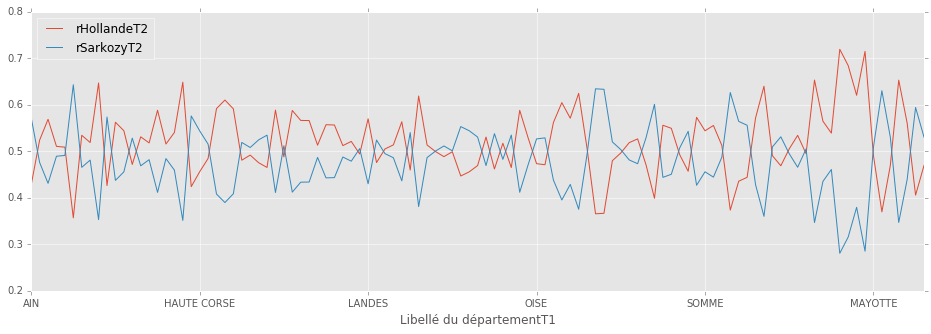

In [10]:
data.plot(x="Libellé du départementT1", y=["rHollandeT2", "rSarkozyT2"], figsize=(16,5))

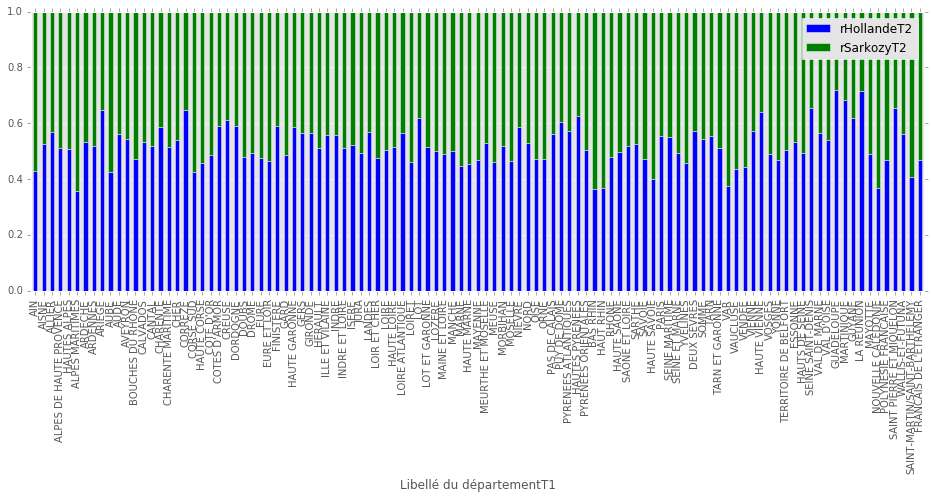

In [11]:
data.plot(x="Libellé du départementT1", y=["rHollandeT2", "rSarkozyT2"], figsize=(16,5), kind="bar", stacked=True)

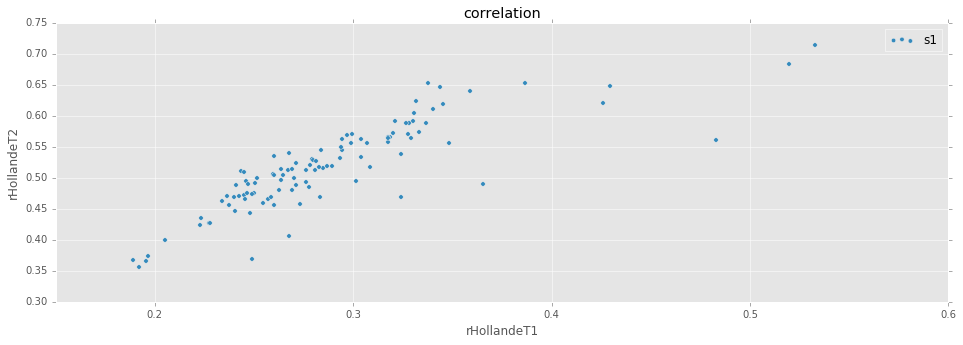

In [12]:
data.plot(x="rHollandeT1", y="rHollandeT2", figsize=(16,5), kind="scatter", label="s1", title="correlation")

### superposition

La méthode [plot](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html?highlight=plot#pandas.DataFrame.plot) retourne un objet de type [Axes](http://matplotlib.org/api/axes_api.html). On peut superposer plusieurs courbes sur le même graphique en s'assurant que la seconde courbe utilise le même objet.

<class 'matplotlib.axes._subplots.AxesSubplot'>


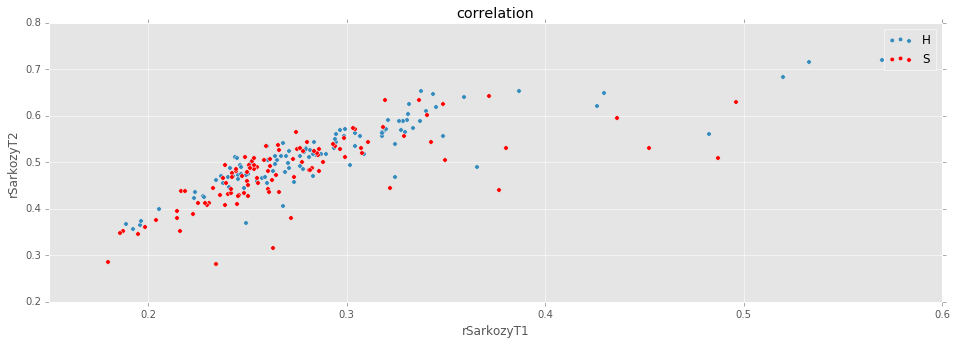

In [13]:
ax = data.plot(x="rHollandeT1", y="rHollandeT2", figsize=(16,5), kind="scatter", label="H", title="correlation")
print(type(ax))
data.plot(x="rSarkozyT1", y="rSarkozyT2", kind="scatter", label="S", ax=ax, c="red")

On ajoute une ligne avec la méthode [Axes.plot](http://matplotlib.org/api/axes_api.html?highlight=plot#matplotlib.axes.Axes.plot) ou du text avec [text](http://matplotlib.org/api/text_api.html#matplotlib.text.Text) :

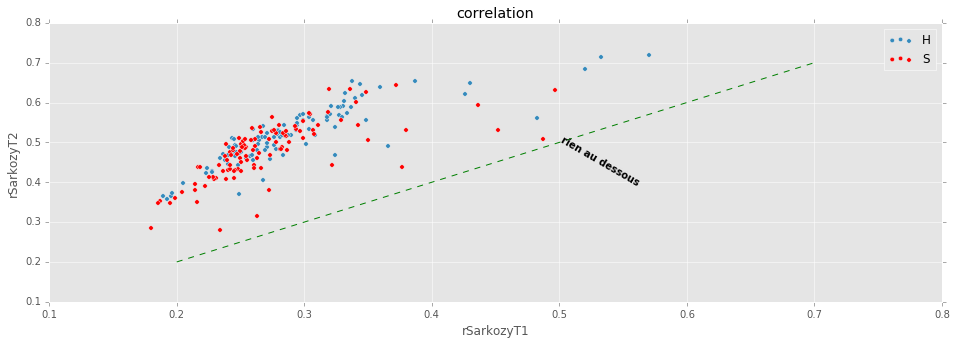

In [14]:
ax = data.plot(x="rHollandeT1", y="rHollandeT2", figsize=(16,5), kind="scatter", label="H", title="correlation")
data.plot(x="rSarkozyT1", y="rSarkozyT2", kind="scatter", label="S", ax=ax, c="red")
ax.plot([0.2,0.7], [0.2,0.7], "g--")
ax.text(0.5, 0.5, "rien au dessous", weight="bold", rotation="-30")

### plusieurs graphes sur la même figure

*pandas* crée une [Figure](http://matplotlib.org/api/pyplot_api.html?highlight=figure#matplotlib.pyplot.figure) de façon implicite avec un seul graphe. Pour créer plusieurs graphes, il faut créer ce type d'objet en précisant qu'il y aura plusieurs [Axes](http://matplotlib.org/api/axes_api.html) avec la fonction [subplots](http://matplotlib.org/api/pyplot_api.html?highlight=figure#matplotlib.pyplot.subplots) et les transmettre à *pandas*. On peut également partager l'axe des X ou l'axe des Y.

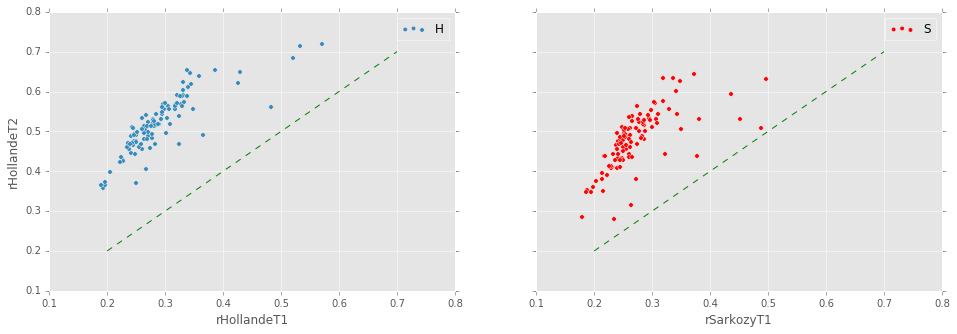

In [15]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 2, figsize=(16,5), sharey=True)
data.plot(x="rHollandeT1", y="rHollandeT2", figsize=(16,5), kind="scatter", label="H", ax=axes[0])
data.plot(x="rSarkozyT1", y="rSarkozyT2", kind="scatter", label="S", ax=axes[1], c="red")
axes[0].plot([0.2,0.7], [0.2,0.7], "g--")
axes[1].plot([0.2,0.7], [0.2,0.7], "g--")

### matplolib sans pandas

On peut se passer de pandas et s'inspirer d'un graphe de la gallerie pour ajouter des points dépendants du nombre de votants [scatter_demo](http://matplotlib.org/examples/shapes_and_collections/scatter_demo.html) et ajouter une légende manuellement avec la méthode [legend](http://matplotlib.org/api/axes_api.html?highlight=legend#matplotlib.axes.Axes.legend).

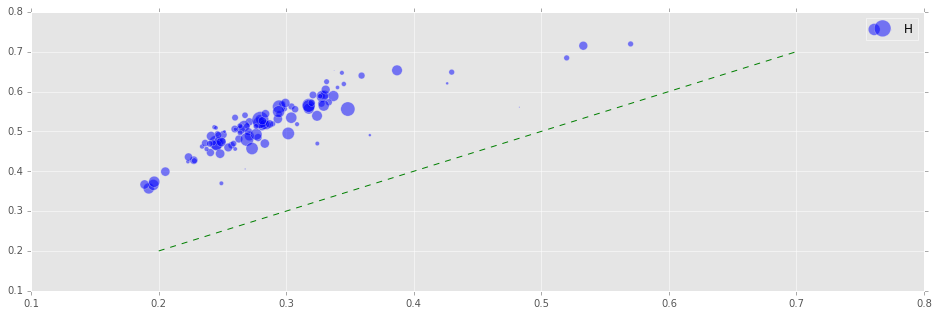

In [16]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 1, figsize=(16,5))
c = axes.scatter(x=data["rHollandeT1"], 
            y=data["rHollandeT2"], 
            s=data["VotantsT1"]/5000, alpha=0.5)
axes.plot([0.2,0.7], [0.2,0.7], "g--")
axes.legend( (c,), ("H",) )

## Pandas et graphes prêts à l'emploi

### histogrammes

avec [hist](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.hist.html?highlight=hist#pandas.DataFrame.hist)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000004E2BEF0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000000C9BAA58>]], dtype=object)

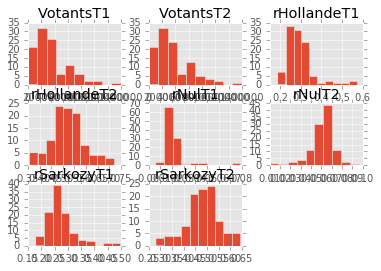

In [17]:
data.hist()

Le paramètre *figsize* permettrait de modifier la taille du graphique.

### correlations

avec [scatter_matrix](http://pandas.pydata.org/pandas-docs/stable/visualization.html#scatter-matrix-plot)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000CB69208>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000000EE93B38>]], dtype=object)

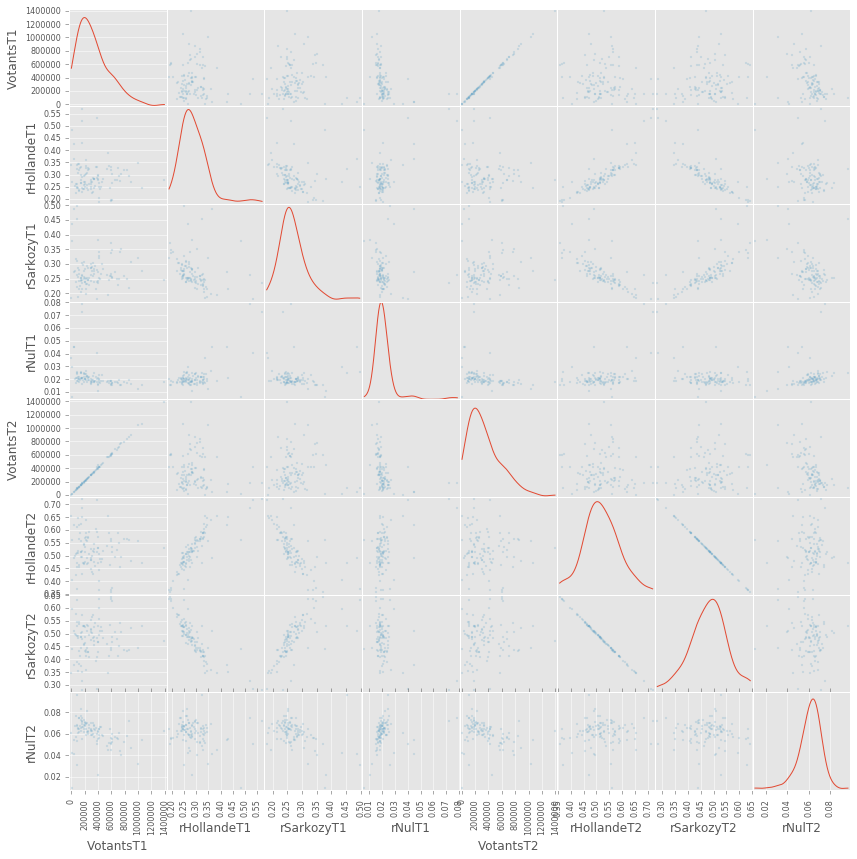

In [18]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix(data, alpha=0.2, figsize=(14, 14), diagonal='kde')

## cartes avec basemap

Je recommande la lecture de ce tutoriel [Visualization: Mapping Global Earthquake Activity](http://introtopython.org/visualization_earthquakes.html). Les exemples se font avec le module [basemap](http://matplotlib.org/basemap/). Les coordonnées sur une carte se font avec des [coordonnées géographiques](https://fr.wikipedia.org/wiki/Coordonn%C3%A9es_g%C3%A9ographiques) : longitude et latitude. La distance entre deux lieux géographiques se calcule grâce à la [distance de Haversine](https://en.wikipedia.org/wiki/Haversine_formula).

Alternative à basemap : [cartopy](http://scitools.org.uk/cartopy/).

### une carte simple

On la choisit centrée sur la France. On crée la carte à l'aide de l'objet [Basemap](http://matplotlib.org/basemap/api/basemap_api.html?highlight=basemap#mpl_toolkits.basemap.Basemap). Comme elle accepte un argument ``ax``, il est possible de changer sa taille ou de la juxtaposer à côté d'un autre graphe. Les couleurs peuvent être être décrite en hexadécimale ``#RRVVBB`` (rouge, vert, bleu) ou on peut utiliser la palette des [couleurs](http://www.python-simple.com/img/img36.png).

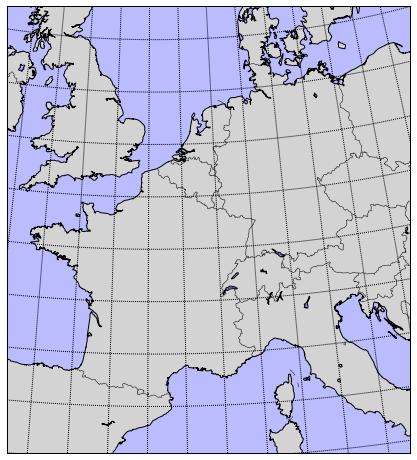

In [19]:
from mpl_toolkits.basemap import Basemap
import numpy

import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 1, figsize=(8,8))

m = Basemap(llcrnrlon=-5,llcrnrlat=40,urcrnrlon=20,urcrnrlat=56,
            resolution='i',projection='cass',lon_0=2.34,lat_0=48,
           ax=axes)
m.drawcoastlines()
m.drawcountries()
m.fillcontinents(color='lightgrey', lake_color='#AAAAFF')

m.drawparallels(numpy.arange(-40,61.,2.))
m.drawmeridians(numpy.arange(-20.,21.,2.))
m.drawmapboundary(fill_color='#BBBBFF')

### exercice 1 : centrer la carte de la France

### ajouter du texte ou une marque

Sur une carte, on veut la plupart du temps ajouter du texte. On reprend le début de ce code qu'on place dans une fonction, puis on place Paris. On utilise pour cela les fonctions standard de *matplotlib* mais on convertit les coordonnées géographiques en coordonnées relatives au graphe (donc dans un repère différent).

In [20]:
def carte_france():
    from mpl_toolkits.basemap import Basemap
    import numpy

    import matplotlib.pyplot as plt
    fig, axes = plt.subplots(1, 1, figsize=(8,8))

    m = Basemap(llcrnrlon=-5,llcrnrlat=40,urcrnrlon=20,urcrnrlat=56,
                resolution='i',projection='cass',lon_0=2.34,lat_0=48,
               ax=axes)
    m.drawcoastlines()
    m.drawcountries()
    m.fillcontinents(color='lightgrey', lake_color='#AAAAFF')

    m.drawparallels(numpy.arange(-40,61.,2.))
    m.drawmeridians(numpy.arange(-20.,21.,2.))
    m.drawmapboundary(fill_color='#BBBBFF')
    return m, axes

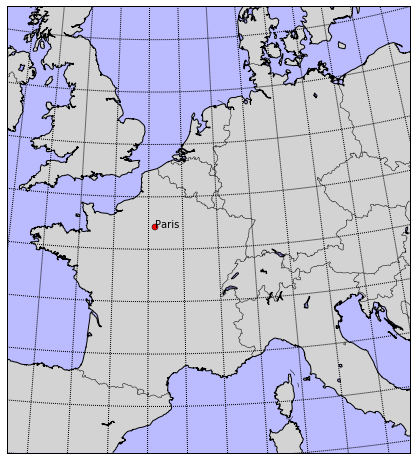

In [21]:
import matplotlib.pyplot as plt

m, ax = carte_france()

lon = 2.3488000
lat = 48.853410
x,y = m(lon, lat)  # la conversion opère ici
m.plot(x, y, 'ro', markersize=6)
ax.text(x, y, "Paris")

On connaît rarement les coordonnées de chaque ville mais un moteur de recherche donne rapidement des pistes pour trouver ces données. Il faut néanmoins s'assurer que le licence autorise ce qu'on l'intention de faire avec :

[Liste des villes de France en SQL, CSV ou XML](http://sql.sh/736-base-donnees-villes-francaises)

In [22]:
import pyensae
pyensae.download_data("villes_france.csv", url="http://sql.sh/ressources/sql-villes-france/")

'villes_france.csv'

In [23]:
cols = ["ncommune", "numero_dep", "slug", "nom", "nom_simple", "nom_reel", "nom_soundex", "nom_metaphone", "code_postal",
    "numero_commune", "code_commune", "arrondissement", "canton", "pop2010", "pop1999", "pop2012",
    "densite2010", "surface", "superficie", "dlong", "dlat", "glong", "glat", "slong", "slat", "alt_min", "alt_max"]
import pandas
df = pandas.read_csv("villes_france.csv", header=False,low_memory=False,
                    names=cols)

In [24]:
df.head()

,ncommune,numero_dep,slug,nom,nom_simple,nom_reel,nom_soundex,nom_metaphone,code_postal,numero_commune,...,surface,superficie,dlong,dlat,glong,glat,slong,slat,alt_min,alt_max
0,2,01,cormoranche-sur-saone,CORMORANCHE-SUR-SAONE,cormoranche sur saone,Cormoranche-sur-Saône,C65652625,KRMRNXSRSN,01290,123,...,107,9.85,4.83333,46.2333,2772,51379,44953,461427,168,211
1,3,01,plagne-01,PLAGNE,plagne,Plagne,P425,PLKN,01130,298,...,20,6.20,5.73333,46.1833,3769,51324,54342,461131,560,922
2,4,01,tossiat,TOSSIAT,tossiat,Tossiat,T230,TST,01250,422,...,138,10.17,5.31667,46.1333,3309,51268,51854,460828,244,501
3,5,01,pouillat,POUILLAT,pouillat,Pouillat,P430,PLT,01250,309,...,14,6.23,5.43333,46.3333,3435,51475,52542,461938,333,770
4,6,01,torcieu,TORCIEU,torcieu,Torcieu,T620,TRS,01230,421,...,65,10.72,5.40000,45.9167,3398,51025,52343,455521,257,782


### exercice 2 : placer les plus grandes villes de France sur la carte

### départements

Pour dessiner des formes sur une carte, il faut connaître les coordonnées de ces formes. L'article suivant [Matplotlib Basemap tutorial 10: Shapefiles Unleached, continued](http://www.geophysique.be/2013/02/12/matplotlib-basemap-tutorial-10-shapefiles-unleached-continued/) permet de dessiner les départements belges. On va s'en inspirer pour dessiner les départements français. La première chose à faire est de récupérer des données géographiques. Une façon simple de les trouver est d'utiliser un moteur de recherche avec le mot clé **shapefile** inclus dedans : c'est le format du fichier. *shapefile france* permet d'obtenir quelques sources. En voici d'autres :

* [GADM](http://www.gadm.org/) : database of Global Administrative Areas
* [OpenData.gouv commune](https://www.data.gouv.fr/fr/datasets/geofla-communes/) : base de données sur data.gouv.fr
* [The National Map Small-Scale Collection](http://nationalmap.gov/small_scale/#chpbound) : Etats-Unis
* [ArcGIS](https://developers.arcgis.com/javascript/jsapi/esri.basemaps-amd.html) : API Javascripts
* [Natural Earth](http://www.naturalearthdata.com/) : Natural Earth is a public domain map dataset available at 1:10m, 1:50m, and 1:110 million scales. Featuring tightly integrated vector and raster data, with Natural Earth you can make a variety of visually pleasing, well-crafted maps with cartography or GIS software.
* [thematicmapping](http://thematicmapping.org/downloads/world_borders.php) : World Borders Dataset
* [OpenStreetMap Data Extracts](http://download.geofabrik.de/) : OpenStreetMap data
* [OpenStreetMapData](http://openstreetmapdata.com/) : OpenStreetMap data
* [Shapefile sur Wikipedia](http://wiki.openstreetmap.org/wiki/Shapefiles) : contient divers liens vers des sources de données

La première chose à vérifier est la licence associées aux données : on ne peut pas en faire ce qu'on veut. Pour cet exemple, j'ai choisi la première source de données, GADM. La licence n'est pas précisée explicitement (on peut trouver *happy to share* sur le site, la page wikipedia [GADM](https://en.wikipedia.org/wiki/GADM) précise :

*GADM is not freely available for commercial use. The GADM project created the spatial data for many countries from spatial databases provided by national governments, NGO, and/or from maps and lists of names available on the Internet (e.g. from Wikipedia).*

En guise d'exemple, cela suffit. On télécharge les données françaises [FRA_adm.zip](http://biogeo.ucdavis.edu/data/gadm2.7/shp/FRA_adm.zip).

In [25]:
from pyensae import download_data
download_data("FRA_adm.zip", website="http://biogeo.ucdavis.edu/data/gadm2.7/shp/")

['FRA_adm0.cpg',
 'FRA_adm0.csv',
 'FRA_adm0.dbf',
 'FRA_adm0.prj',
 'FRA_adm0.shp',
 'FRA_adm0.shx',
 'FRA_adm1.cpg',
 'FRA_adm1.csv',
 'FRA_adm1.dbf',
 'FRA_adm1.prj',
 'FRA_adm1.shp',
 'FRA_adm1.shx',
 'FRA_adm2.cpg',
 'FRA_adm2.csv',
 'FRA_adm2.dbf',
 'FRA_adm2.prj',
 'FRA_adm2.shp',
 'FRA_adm2.shx',
 'FRA_adm3.cpg',
 'FRA_adm3.csv',
 'FRA_adm3.dbf',
 'FRA_adm3.prj',
 'FRA_adm3.shp',
 'FRA_adm3.shx',
 'FRA_adm4.cpg',
 'FRA_adm4.csv',
 'FRA_adm4.dbf',
 'FRA_adm4.prj',
 'FRA_adm4.shp',
 'FRA_adm4.shx',
 'FRA_adm5.cpg',
 'FRA_adm5.csv',
 'FRA_adm5.dbf',
 'FRA_adm5.prj',
 'FRA_adm5.shp',
 'FRA_adm5.shx',
 'license.txt']

La license accompagne les données :
    
*These data were extracted from the GADM database (www.gadm.org), version 2.5, July 2015. They can be used for non-commercial purposes only.  It is not allowed to redistribute these data, or use them for commercial purposes, without prior consent.*

Pour un usage commercial, il faudra utiliser une autre source de données comme celle proposée par data.gouv.fr [GEOFLA® Départements](https://www.data.gouv.fr/fr/datasets/geofla-departements-30383060/) qui est soumis à la licence [etalab](https://www.etalab.gouv.fr/licence-ouverte-open-licence). Comme dans l'exemple proposé plus haut, on lit les données :

In [26]:
import shapefile
r = shapefile.Reader("fra_adm3")
shapes = r.shapes()
records = r.records()
len(shapes), len(records)

(350, 350)

In [27]:
shapes[0].__dict__

{'bbox': [7.485558986663932, 48.69053649902361, 8.107298851013212, 49.041690826416286],
 'parts': [0],
 'points': [[7.703419685363713, 48.935829162597656],
  [7.717102527618522, 48.922370910644645],
  [7.720583915710449, 48.90651321411133],
  [7.706304073333797, 48.90758895874035],
  [7.693669319152946, 48.90281677246111],
  [7.697267532348633, 48.890766143799055],
  [7.70648002624506, 48.88809585571312],
  [7.687735080718994, 48.883834838867244],
  [7.68739843368536, 48.87797164917015],
  [7.706393241882438, 48.879741668701286],
  [7.707155704498348, 48.88046646118187],
  [7.711010932922477, 48.872360229492415],
  [7.719671249389648, 48.87117004394531],
  [7.723189830780143, 48.868862152099666],
  [7.747834682464713, 48.86820220947277],
  [7.7588915824890705, 48.87860107421892],
  [7.772598743438834, 48.883583068847656],
  [7.807376861572266, 48.87720108032249],
  [7.814932346343937, 48.88592529296881],
  [7.800405502319393, 48.89002227783203],
  [7.806757926940918, 48.90228271484398]

350 départements, sûr ?

In [28]:
records[0], records[1]

([79,
  'FRA',
  'France',
  1,
  'Alsace',
  1,
  'Bas-Rhin',
  1,
  'Haguenau',
  'Arrondissement',
  'Districts',
  b'                                                                           ',
  b'                                                                                                    '],
 [79,
  'FRA',
  'France',
  1,
  'Alsace',
  1,
  'Bas-Rhin',
  2,
  'Molsheim',
  'Arrondissement',
  'Districts',
  b'                                                                           ',
  b'                                                                                                    '])

In [29]:
len(set([r[6] for r in records]))

96

Puis je récupère le code final (toujours à [Matplotlib Basemap tutorial 10: Shapefiles Unleached, continued](http://www.geophysique.be/2013/02/12/matplotlib-basemap-tutorial-10-shapefiles-unleached-continued/)) en l'adaptant pour la France.

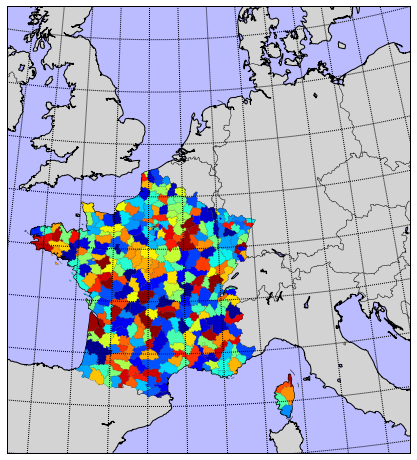

In [30]:
from matplotlib.collections import LineCollection
from matplotlib import cm
import shapefile

m, ax = carte_france()

r = shapefile.Reader("fra_adm3")
shapes = r.shapes()
records = r.records()
 
for record, shape in zip(records,shapes):
    lons,lats = zip(*shape.points)
    data = np.array(m(lons, lats)).T
 
    if len(shape.parts) == 1:
        segs = [data,]
    else:
        segs = []
        for i in range(1,len(shape.parts)):
            index = shape.parts[i-1]
            index2 = shape.parts[i]
            segs.append(data[index:index2])
        segs.append(data[index2:])
 
    lines = LineCollection(segs,antialiaseds=(1,))
    
    # pour changer les couleurs c'est ici, il faudra utiliser le champ records
    # pour les changer en fonction du nom du départements
    lines.set_facecolors(cm.jet(np.random.rand(1)))
    lines.set_edgecolors('k')
    lines.set_linewidth(0.1)
    ax.add_collection(lines)

### exercice 3 : résultats des élections par départements

Ce n'est pas toujours évident !

## seaborn

[seaborn](http://stanford.edu/~mwaskom/software/seaborn/) propose des graphiques inéressants pour un statisticien. La [gallerie](http://stanford.edu/~mwaskom/software/seaborn/examples/index.html) en donne un bon aperçu. On retravaille peu les graphiques. Le code suivant montre les corrélations entre variables [pairplot](http://stanford.edu/~mwaskom/software/seaborn/examples/scatterplot_matrix.html).

**warning** les warnings sont la plupart du temps dûs au fait que *seaborn* a été testé sur une version antérieure d'une de ses dépendances comme *matplotlib* et qu'il n'est pas encore à jour pour tenir compte des derniers développement.

c:\python34_x64\lib\site-packages\matplotlib\__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))
c:\python34_x64\lib\site-packages\matplotlib\__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


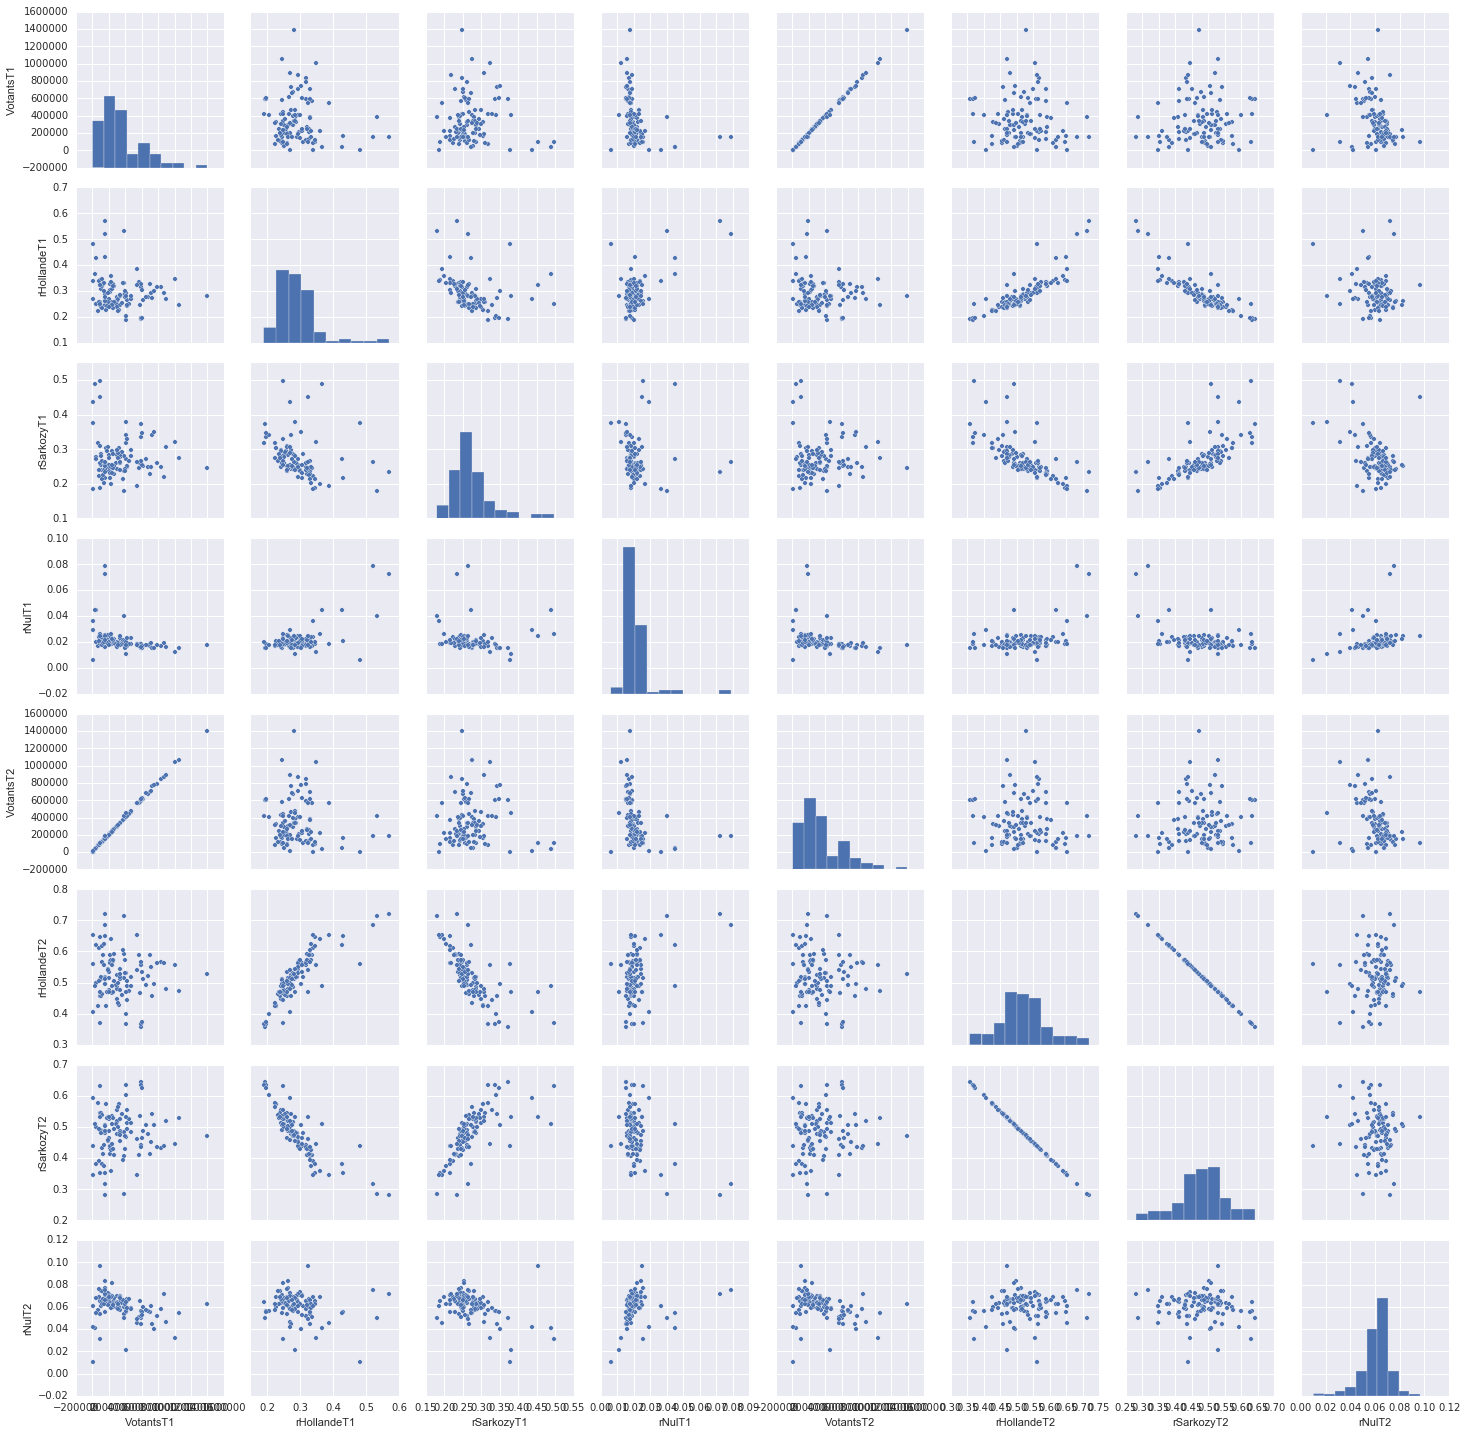

In [31]:
import seaborn
seaborn.pairplot(data_elections)

Celui-ci est aussi intéressant : [clustermap](http://stanford.edu/~mwaskom/software/seaborn/examples/structured_heatmap.html) pour étudier les corrélations.

c:\python34_x64\lib\site-packages\matplotlib\__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


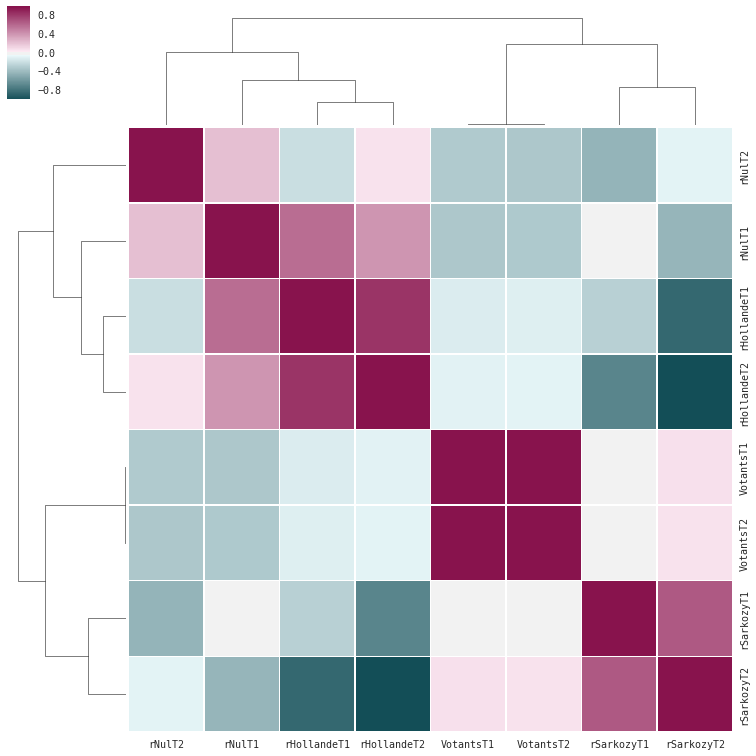

In [32]:
import seaborn
seaborn.set(font="monospace")

cmap = seaborn.diverging_palette(h_neg=210, h_pos=350, s=90, l=30, as_cmap=True)

seaborn.clustermap(data_elections.corr(), linewidths=.5, figsize=(13, 13), cmap=cmap)

## bokeh

[bokeh](http://bokeh.pydata.org/en/latest/) propose des graphiques en javascript. La [gallerie](http://bokeh.pydata.org/en/latest/docs/gallery.html) est moins fournie que celle de matplotib. Le principale avantage de bokeh est de proposer gaphiques zoomables (interactifs).

### initialisation

La première étape est de signifier que la sortie se fera dans un notebook.


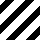
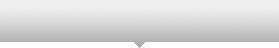
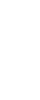
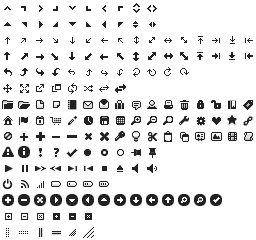
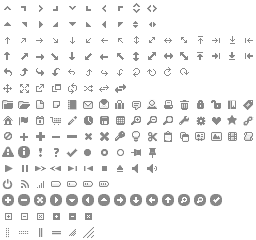
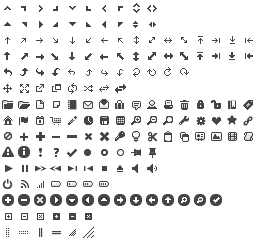
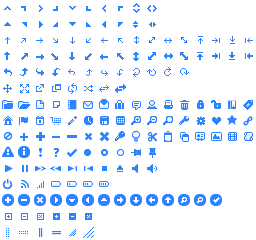
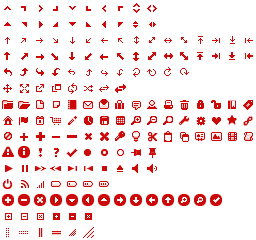
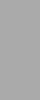
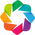
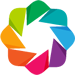
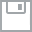
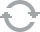
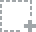
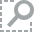
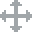
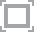
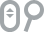

In [33]:
from bokeh.plotting import output_notebook
output_notebook()

### premier graphe

On utilise bokeh pour un simple graphique XY. on peut choisir les différentes options interactives, zoom ... Voir [tools](http://bokeh.pydata.org/en/latest/docs/user_guide/tools.html#specifying-tools).

In [34]:
from bokeh.plotting import figure, show

p = figure(title = "élections")
p.title = "élections"
p.circle(data_elections["rHollandeT1"], data_elections["rHollandeT2"], color="red", fill_alpha=0.2, size=10, legend="H")
p.circle(data_elections["rSarkozyT1"], data_elections["rSarkozyT2"], color="blue", fill_alpha=0.2, size=10, legend="S")
p.line([0.2,0.7], [0.2,0.7], "g--")
p.xaxis.axis_label = "tour 1"
p.yaxis.axis_label = "tour 2"
show(p)

### ajouter du texte

Les différents éléments qu'on peut ajouter au graphe s'appelle des [Glyphes](http://bokeh.pydata.org/en/latest/docs/reference/bokehjs.html). La documentation manque parfois de précision. Pour la fonction [text](http://bokeh.pydata.org/en/latest/docs/reference/bokehjs.html#text), il faut préciser le texte à afficher sous forme de liste.

In [35]:
from bokeh.plotting import figure, show

p = figure(title = "élections")
p.title = "élections"
p.circle(data_elections["rHollandeT1"], data_elections["rHollandeT2"], color="red", fill_alpha=0.2, size=10, legend="H")
p.circle(data_elections["rSarkozyT1"], data_elections["rSarkozyT2"], color="blue", fill_alpha=0.2, size=10, legend="S")
p.line([0.2,0.7], [0.2,0.7], "g--")
p.xaxis.axis_label = "tour 1"
p.yaxis.axis_label = "tour 2"


def display_text(p, row):
    p.text(x=row["rHollandeT1"], y=row["rHollandeT2"], text=[row["Libellé du départementT1"]],
          text_font_size="8pt", color="black", text_align="left", text_baseline="middle", angle=0)
    return row["Libellé du départementT1"]

data_elections.apply(lambda row: display_text(p, row), axis=1)

show(p)

### composition de graphes

Voir [linked brushing](http://bokeh.pydata.org/en/latest/docs/user_guide/interaction.html#linked-brushing).

In [36]:
from bokeh.plotting import figure, show, gridplot
size = 400

ph = figure(title = "élections", width=size, height=size)
ph.title = "élections"
ph.circle(data_elections["rHollandeT1"], data_elections["rHollandeT2"], color="red", fill_alpha=0.2, size=10, legend="H")
ph.line([0.2,0.7], [0.2,0.7], "g--")
ph.xaxis.axis_label = "tour 1"
ph.yaxis.axis_label = "tour 2"

ps = figure(title = "élections", width=size, height=size)
ps.title = "élections"
ps.circle(data_elections["rSarkozyT1"], data_elections["rSarkozyT2"], color="blue", fill_alpha=0.2, size=10, legend="S")
ps.line([0.2,0.7], [0.2,0.7], "g--")
ps.xaxis.axis_label = "tour 1"
ps.yaxis.axis_label = "tour 2"

p = gridplot([[ph, ps]])

show(p)

### interactions avec bokeh

Tout est expliqué dans la page [interaction](http://bokeh.pydata.org/en/latest/docs/user_guide/interaction.html).


In [37]:
from bokeh.models.widgets import Panel, Tabs
from bokeh.io import show
from bokeh.plotting import figure

ph = figure(title="élections")
ph.circle(data_elections["rHollandeT1"], data_elections["rHollandeT2"], color="red", fill_alpha=0.2, size=10, legend="H")
ph.line([0.2,0.7], [0.2,0.7], "g--")
ph.xaxis.axis_label = "tour 1"
ph.yaxis.axis_label = "tour 2"

ps = figure(title = "élections")
ps.title = "élections"
ps.circle(data_elections["rSarkozyT1"], data_elections["rSarkozyT2"], color="blue", fill_alpha=0.2, size=10, legend="S")
ps.line([0.2,0.7], [0.2,0.7], "g--")
ps.xaxis.axis_label = "tour 1"
ps.yaxis.axis_label = "tour 2"

tab1 = Panel(child=ph, title="Hollande")
tab2 = Panel(child=ps, title="Sarkozy")

tabs = Tabs(tabs=[ tab1, tab2 ])

show(tabs)

Si on connaît un peu de javascript, on peut créer des graphes qui peuvent interagir avec la souris à n'importe quel endroit du graphe.

## interaction avec matplotlib (ou bokeh)

### dropdown

Le module [interact](https://github.com/ipython/ipywidgets) permet de changer le contenu d'une cellule en fonction d'un bouton, d'une barre de défilement... Le code de cette fonction est sur [github](https://github.com/ipython/ipywidgets/blob/master/ipywidgets/widgets/interaction.py). La liste des widget possible est dans le notebook [WidgetList](https://github.com/ipython/ipywidgets/blob/477cb8046e3217b134762f53c66816c45d688a20/examples/Widget%20List.ipynb)

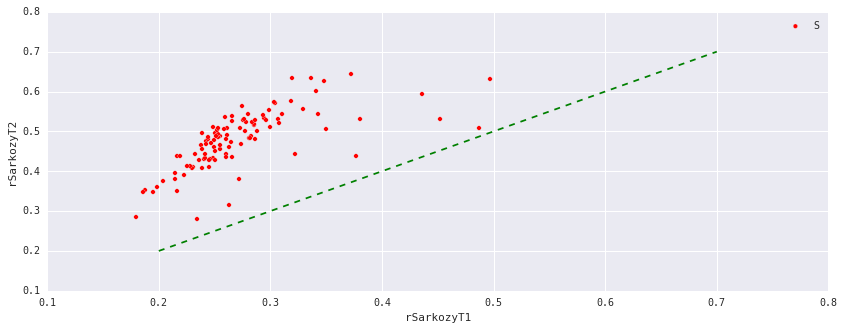

In [38]:
import matplotlib.pyplot as plt
from IPython.html.widgets import interact, Dropdown

def plot(cand):
    
    fig, axes = plt.subplots(1, 1, figsize=(14,5), sharey=True)
    if cand=="Hollande":
        data_elections.plot(x="rHollandeT1", y="rHollandeT2", kind="scatter", label="H", ax=axes)
    else:
        data_elections.plot(x="rSarkozyT1", y="rSarkozyT2", kind="scatter", label="S", ax=axes, c="red")
    axes.plot([0.2,0.7], [0.2,0.7], "g--")
    return axes

cand = Dropdown(options=['Hollande', 'Sarkozy'], value='Hollande', description='candidat')

interact(plot, cand=cand)
print("")

Ces interactions ne sont pas limitées à matplotlib. Tout type de sortie peut dépendre d'un *widget*.

### exercice 4 : même code, widget différent 

## autres options

Il existe un grande nombre de modules permettant de dessiner. Les plus récents utilisent le javascript.

* static

    * [ggplot](http://ggplot.yhathq.com/) : aspect similare à matplotlib version ggplot mais la syntaxe est différente

* Javascript

    * [pygal](http://www.pygal.org/en/latest/) : voir exemple plus bas, aspect réussi, le module prévoit une extension pour les [carte](http://www.pygal.org/en/latest/documentation/types/maps/pygal_maps_fr.html), le résultat nécessite l'ajout de quelques scripts Javascript
    * [mpld3](http://mpld3.github.io/) : créer un graphe avec la syntaxe Javascript et le transformer en Javascript
    * [folium](https://github.com/python-visualization/folium) : Javascript + [OpenStreetMap](https://www.openstreetmap.org/)


In [39]:
html_pygal = """<script type="text/javascript" src="http://kozea.github.com/pygal.js/javascripts/svg.jquery.js"></script>
<script type="text/javascript" src="http://kozea.github.com/pygal.js/javascripts/pygal-tooltips.js"></script>
{pygal_render}
"""

from IPython.core.display import HTML
import pygal
xy_chart = pygal.XY(stroke=False)
xy_chart.title = 'Elections 2012'
xy = list(zip(data_elections["rHollandeT1"], data_elections["rHollandeT2"]))
xy_chart.add('H', xy)
HTML(html_pygal.format(pygal_render=xy_chart.render().decode()))